In [23]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Read housing data set csv into memory
data=pd.read_csv("../data/Boston_housing_data.csv",low_memory='False')

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

In [25]:
# Upper case all data frame column names
data.columns=map(str.upper, data.columns)

#check dimensions of data set
(rows,features)= data.shape
print "Number of rows in data set - ", rows
print "Number of features in data set - ",features
print data.head(10)
data.describe()

Number of rows in data set -  506
Number of features in data set -  14
      CRIM        ZN    INDUS  CHAS      NOX       RM        AGE      DIS  \
0 0.006320 18.000000 2.310000     0 0.538000 6.575000  65.200000 4.090000   
1 0.027310  0.000000 7.070000     0 0.469000 6.421000  78.900000 4.967100   
2 0.027290  0.000000 7.070000     0 0.469000 7.185000  61.100000 4.967100   
3 0.032370  0.000000 2.180000     0 0.458000 6.998000  45.800000 6.062200   
4 0.069050  0.000000 2.180000     0 0.458000 7.147000  54.200000 6.062200   
5 0.029850  0.000000 2.180000     0 0.458000 6.430000  58.700000 6.062200   
6 0.088290 12.500000 7.870000     0 0.524000 6.012000  66.600000 5.560500   
7 0.144550 12.500000 7.870000     0 0.524000 6.172000  96.100000 5.950500   
8 0.211240 12.500000 7.870000     0 0.524000 5.631000 100.000000 6.082100   
9 0.170040 12.500000 7.870000     0 0.524000 6.004000  85.900000 6.592100   

   RAD  TAX   PTRATIO          B     LSTAT      MEDV  
0    1  296 15.300000 396.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


 Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [26]:
print data.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')


In [5]:
# As part of my research, I'm interested in seeing the correlation between MEDV and 
# proximity from schools, employment centres 
# Pollution levels and social status
'''
Output variable
-----------------
MEDV     Median value of owner-occupied homes in $1000's

Features I'm interested in : 
==============================================================

NOX       nitric oxides concentration (parts per 10 million)
RAD       index of accessibility to radial highways
CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
DIS       weighted distances to five Boston employment centres
PTRATIO  pupil-teacher ratio by town
LSTAT    % lower status of the population
==============================================================

Features which directly impact house value:
------------------------------------------------
RM        average number of rooms per dwelling
AGE       proportion of owner-occupied units built prior to 1940


'''

data = data [["MEDV","NOX","RAD","CHAS","DIS","PTRATIO","LSTAT","RM","AGE"]]

print " current data set dimensions", data.shape

 current data set dimensions (506, 9)


In [6]:
#setting variables you will be working with to numeric
data['MEDV'] = pd.to_numeric(data['MEDV'])
data['NOX'] = pd.to_numeric(data['NOX'])
data['RAD'] = pd.to_numeric(data['RAD'])
data['CHAS'] = pd.to_numeric(data['CHAS'])
data['DIS'] = pd.to_numeric(data['DIS'])
data['PTRATIO'] = pd.to_numeric(data['PTRATIO'])
data['LSTAT'] = pd.to_numeric(data['LSTAT'])
data['RM'] = pd.to_numeric(data['RM'])
data['AGE'] = pd.to_numeric(data['AGE'])

## UniVariate Analysis

In [7]:
# NOX indicates nitric oxides concentration - parts per 10 million
# This being an indicator of pollution level, NOX should negatively impact house value

print "\n** Frequency ditribution of NOX feature **" 
print data["NOX"].value_counts(dropna='False').sort_index()
print "Percentages for NOX"
data["NOX"].value_counts(normalize='True',dropna='False').sort_index()


** Frequency ditribution of NOX feature **
0.385000     1
0.389000     1
0.392000     2
0.394000     1
0.398000     2
0.400000     4
0.401000     3
0.403000     3
0.404000     3
0.405000     3
0.409000     3
0.410000     3
0.411000     6
0.413000     6
0.415000     2
0.416100     3
0.422000     1
0.426000     4
0.428000     8
0.429000     3
0.431000    10
0.433000     3
0.435000     1
0.437000    17
0.437900     2
0.439000     4
0.442000     3
0.442900     4
0.445000     5
0.447000     5
            ..
0.538000    23
0.544000    12
0.547000     9
0.550000     4
0.573000     5
0.575000     2
0.580000     4
0.581000     7
0.583000     4
0.584000     8
0.585000     8
0.597000     6
0.605000    14
0.609000     5
0.614000     7
0.624000    15
0.631000     5
0.647000    10
0.655000     3
0.659000     2
0.668000     3
0.671000     7
0.679000     8
0.693000    14
0.700000    11
0.713000    18
0.718000     6
0.740000    13
0.770000     8
0.871000    16
Name: NOX, dtype: int64
Percentages for N

0.385000   0.001976
0.389000   0.001976
0.392000   0.003953
0.394000   0.001976
0.398000   0.003953
0.400000   0.007905
0.401000   0.005929
0.403000   0.005929
0.404000   0.005929
0.405000   0.005929
0.409000   0.005929
0.410000   0.005929
0.411000   0.011858
0.413000   0.011858
0.415000   0.003953
0.416100   0.005929
0.422000   0.001976
0.426000   0.007905
0.428000   0.015810
0.429000   0.005929
0.431000   0.019763
0.433000   0.005929
0.435000   0.001976
0.437000   0.033597
0.437900   0.003953
0.439000   0.007905
0.442000   0.005929
0.442900   0.007905
0.445000   0.009881
0.447000   0.009881
             ...   
0.538000   0.045455
0.544000   0.023715
0.547000   0.017787
0.550000   0.007905
0.573000   0.009881
0.575000   0.003953
0.580000   0.007905
0.581000   0.013834
0.583000   0.007905
0.584000   0.015810
0.585000   0.015810
0.597000   0.011858
0.605000   0.027668
0.609000   0.009881
0.614000   0.013834
0.624000   0.029644
0.631000   0.009881
0.647000   0.019763
0.655000   0.005929


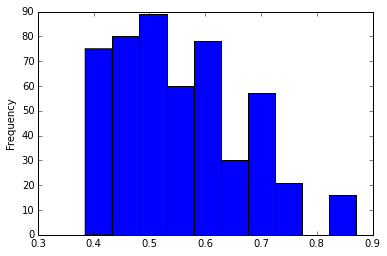

In [8]:
data["NOX"].plot.hist()

In [9]:
'''
NOX values have a range of 0.486 , spread across values (0.385 , 0.871). There are no missing values.
Distribution seems to be skewed to rights
'''

'\nNOX values have a range of 0.486 , spread across values (0.385 , 0.871). There are no missing values.\nDistribution seems to be skewed to rights\n'

In [10]:
data['NOX_Q']=pd.qcut(data.NOX, 4, labels=["1=0%tile","2=25%tile","3=50%tile","4=75%tile"])
print data['NOX_Q'].value_counts(sort=False, dropna=False)
print data['NOX_Q'].value_counts(sort=False, dropna=False,normalize='True')

1=0%tile     129
2=25%tile    143
3=50%tile    110
4=75%tile    124
dtype: int64
1=0%tile    0.254941
2=25%tile   0.282609
3=50%tile   0.217391
4=75%tile   0.245059
dtype: float64



** Frequency ditribution of RAD feature **
1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
Name: RAD, dtype: int64
Percentages for RAD


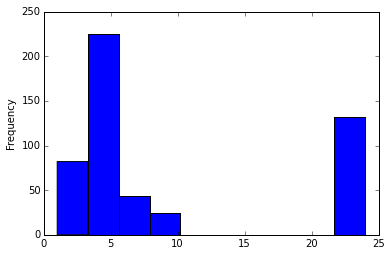

In [11]:
# RAD is an index of accessibility to radial highways 
# This captures locational advantages besides nearness to workplace
# This should positively impact house value

print "\n** Frequency ditribution of RAD feature **" 
print data["RAD"].value_counts(dropna='False').sort_index()
print "Percentages for RAD"
data["RAD"].value_counts(normalize='True',dropna='False').sort_index()
data["RAD"].plot.hist()

In [12]:
# CHAS indicates if tract is bound by Charles River or not
# It is expected that places surrounded by rivers have higher house value

print "\n** Frequency ditribution of CHAS feature **" 
print data["CHAS"].value_counts(dropna='False').sort_index()
print "Percentages for CHAS"
data["CHAS"].value_counts(normalize='True',dropna='False').sort_index()



** Frequency ditribution of CHAS feature **
0    471
1     35
Name: CHAS, dtype: int64
Percentages for CHAS


0   0.930830
1   0.069170
Name: CHAS, dtype: float64


** Frequency ditribution of DIS feature **
1.129600     1
1.137000     1
1.169100     1
1.174200     1
1.178100     1
1.202400     1
1.285200     1
1.316300     1
1.321600     1
1.332500     1
1.344900     1
1.345900     1
1.356700     1
1.358000     1
1.386100     2
1.411800     1
1.413000     1
1.416500     1
1.419100     1
1.425400     1
1.426100     1
1.439400     1
1.439500     1
1.454700     1
1.460800     1
1.465500     1
1.467200     1
1.489600     1
1.500400     1
1.510600     1
            ..
7.035500     2
7.037900     1
7.225400     1
7.225500     1
7.307300     2
7.309000     3
7.317200     3
7.319700     1
7.396700     2
7.653400     2
7.814800     1
7.826500     2
7.827800     3
7.954900     2
7.980900     1
8.013600     2
8.055500     2
8.324800     1
8.344000     1
8.535300     1
8.696600     1
8.792100     2
8.906700     2
9.089200     1
9.187600     1
9.220300     2
9.222900     1
10.585700    2
10.710300    2
12.126500    1
Name: DIS, dtype: int64
Percentages for D

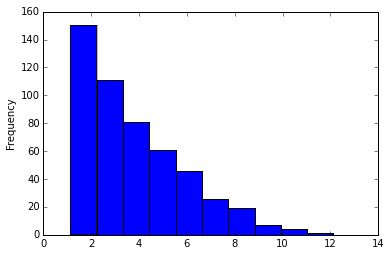

In [13]:
# DIS is weighted distance to five Boston employment centres 
#  This should negatively impact house value

print "\n** Frequency ditribution of DIS feature **" 
print data["DIS"].value_counts(dropna='False').sort_index()
print "Percentages for DIS"
data["DIS"].value_counts(normalize='True',dropna='False').sort_index()
data["DIS"].plot.hist()

In [14]:
# RM indicates average number of rooms per dwelling
# RM should have positive correlation with  higher house value
print data["RM"].count()
print "\n** Frequency ditribution of RM feature **" 
print data["RM"].value_counts(dropna='False').sort_index()

print "Percentages for RM"
data["RM"].value_counts(normalize='True',dropna='False').sort_index()

506

** Frequency ditribution of RM feature **
3.561000    1
3.863000    1
4.138000    2
4.368000    1
4.519000    1
4.628000    1
4.652000    1
4.880000    1
4.903000    1
4.906000    1
4.926000    1
4.963000    1
4.970000    1
4.973000    1
5.000000    1
5.012000    1
5.019000    1
5.036000    1
5.093000    1
5.155000    1
5.186000    1
5.272000    1
5.277000    1
5.304000    2
5.344000    1
5.349000    1
5.362000    1
5.390000    2
5.399000    1
5.403000    1
           ..
7.420000    1
7.454000    1
7.470000    1
7.489000    1
7.520000    1
7.610000    1
7.645000    1
7.686000    1
7.691000    1
7.765000    1
7.802000    1
7.820000    2
7.831000    1
7.853000    1
7.875000    1
7.923000    1
7.929000    1
8.034000    1
8.040000    1
8.069000    1
8.247000    1
8.259000    1
8.266000    1
8.297000    1
8.337000    1
8.375000    1
8.398000    1
8.704000    1
8.725000    1
8.780000    1
Name: RM, dtype: int64
Percentages for RM


3.561000   0.001976
3.863000   0.001976
4.138000   0.003953
4.368000   0.001976
4.519000   0.001976
4.628000   0.001976
4.652000   0.001976
4.880000   0.001976
4.903000   0.001976
4.906000   0.001976
4.926000   0.001976
4.963000   0.001976
4.970000   0.001976
4.973000   0.001976
5.000000   0.001976
5.012000   0.001976
5.019000   0.001976
5.036000   0.001976
5.093000   0.001976
5.155000   0.001976
5.186000   0.001976
5.272000   0.001976
5.277000   0.001976
5.304000   0.003953
5.344000   0.001976
5.349000   0.001976
5.362000   0.001976
5.390000   0.003953
5.399000   0.001976
5.403000   0.001976
             ...   
7.420000   0.001976
7.454000   0.001976
7.470000   0.001976
7.489000   0.001976
7.520000   0.001976
7.610000   0.001976
7.645000   0.001976
7.686000   0.001976
7.691000   0.001976
7.765000   0.001976
7.802000   0.001976
7.820000   0.003953
7.831000   0.001976
7.853000   0.001976
7.875000   0.001976
7.923000   0.001976
7.929000   0.001976
8.034000   0.001976
8.040000   0.001976


The variable "RM" has values spread between 3 and 9. I believe it would be more meaningful to consider a value rounded off to nearest integer. So introduced a manged variable RM_ABS

In [15]:
# RM indicates average number of rooms per dwelling
# RM should have positive correlation with  higher house value

data["RM_ABS"]=[int(round(x)) for x in data["RM"]]
print "\n** Frequency ditribution of RM_ABS feature **" 
print data["RM_ABS"].value_counts(dropna='False').sort_index()
print "Percentages for RM_ABS"
data["RM_ABS"].value_counts(normalize='True',dropna='False').sort_index()


** Frequency ditribution of RM_ABS feature **
4      5
5     37
6    312
7    125
8     24
9      3
Name: RM_ABS, dtype: int64
Percentages for RM_ABS


4   0.009881
5   0.073123
6   0.616601
7   0.247036
8   0.047431
9   0.005929
Name: RM_ABS, dtype: float64


** Frequency ditribution of AGE feature **
100.000000    43
87.900000      4
96.000000      4
98.200000      4
97.900000      4
98.800000      4
95.400000      4
96.200000      3
32.200000      3
21.400000      3
97.000000      3
94.100000      3
76.500000      3
95.600000      3
97.400000      3
36.600000      3
92.600000      3
88.000000      3
98.900000      3
97.300000      3
58.700000      2
91.800000      2
98.100000      2
59.700000      2
95.000000      2
27.700000      2
87.300000      2
31.900000      2
94.700000      2
95.300000      2
              ..
35.700000      1
92.200000      1
40.300000      1
68.100000      1
19.100000      1
52.800000      1
83.700000      1
95.700000      1
96.900000      1
94.000000      1
68.800000      1
88.800000      1
53.700000      1
14.700000      1
59.600000      1
88.200000      1
89.000000      1
43.700000      1
73.100000      1
67.200000      1
56.100000      1
28.400000      1
20.100000      1
31.300000      1
68.200000      1
73.9

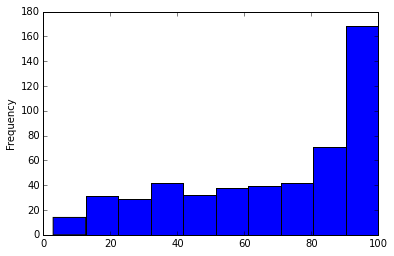

In [28]:
# print data.shape

#Frequency ditribution of "AGE"  feature
print "\n** Frequency ditribution of AGE feature **"
print data["AGE"].value_counts()

print "\n** Percentages for AGE **"
# percentage Frequency ditribution of "AGE" feature
print data["AGE"].value_counts(normalize='True',dropna='False')
data ["AGE"].plot.hist()


# Create bins for AGE variable - converting continuous variable ranges into bins
bins=[0,25,50,75,100]
age_grp=["ultra-modern","modern","old","very-old"]

'''
e.g. rows with AGE >0 and AGE <25  refer to colonies,
     where % of the houses built prior 1940 is at max 25 % .
     Hence such rows are put into "ultra-modern" bucket 

'''

data["AGE_GRP"] = pd.cut(data['AGE'], bins, labels=age_grp)
#Frequency ditribution of "AGE_GRP" derived feature
print "\n** Frequency ditribution of AGE_GRP derived feature **"
print data["AGE_GRP"].value_counts()

print "\n** Percentages for AGE_GRP **"
# percentage Frequency ditribution of "AGE_GRP" derived feature
print data["AGE_GRP"].value_counts(normalize='True',sort='True',dropna='False')





C:\Users\212458098\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


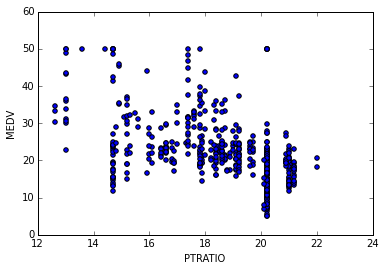

In [17]:
data.plot.scatter("PTRATIO","MEDV")

In [31]:
print (pd.crosstab(data['AGE_GRP'], data['AGE']))

AGE           2.900000    6.000000    6.200000    6.500000    6.600000    \
AGE_GRP                                                                    
ultra-modern           1           1           1           1           2   
modern                 0           0           0           0           0   
old                    0           0           0           0           0   
very-old               0           0           0           0           0   

AGE           6.800000    7.800000    8.400000    8.900000    9.800000    \
AGE_GRP                                                                    
ultra-modern           1           2           1           1           1   
modern                 0           0           0           0           0   
old                    0           0           0           0           0   
very-old               0           0           0           0           0   

AGE              ...      98.200000   98.300000   98.400000   98.500000   \
AGE_GRP   

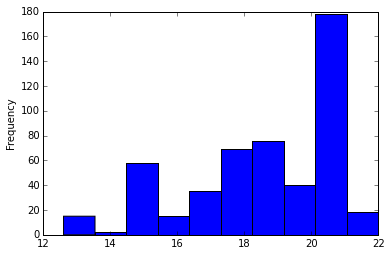

In [18]:
data["PTRATIO"].plot.hist()


** Frequency ditribution of PT_RATIO_ABS derived feature **
12      3
13     13
14     42
15     22
16     41
17     64
18     64
19     56
20    156
21     43
22      2
Name: PTRATIO_ABS, dtype: int64
Percentages for PTRATIO_ABS


12   0.005929
13   0.025692
14   0.083004
15   0.043478
16   0.081028
17   0.126482
18   0.126482
19   0.110672
20   0.308300
21   0.084980
22   0.003953
Name: PTRATIO_ABS, dtype: float64

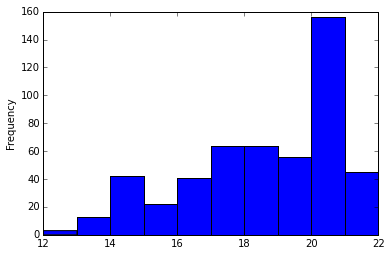

In [19]:
# PTRATIO refers to pupil - Teacher ratio . The lower it is, the better education is.
# i.e. parents who can afford, prefer lower PTRATIO 
# and hence houses in such areas might be expensive

# Convert PTRATIO to integer values and save to PTRATIO_ABS 
data["PTRATIO_ABS"]=data["PTRATIO"].astype(int)
data["PTRATIO_ABS"].plot.hist()
print "\n** Frequency ditribution of PT_RATIO_ABS derived feature **" 
print data["PTRATIO_ABS"].value_counts(dropna='False').sort_index()
print "Percentages for PTRATIO_ABS"
data["PTRATIO_ABS"].value_counts(normalize='True',dropna='False').sort_index()

In [20]:
'''
LSTAT refers to  % lower status of the population
The more LSTAT is the less the house value should be, in general
'''
# Convert LSTAT to integer values and save to LSTAT_ABS 
data["LSTAT_ABS"]=data["LSTAT"].astype(int)

print data["LSTAT_ABS"].value_counts(dropna='False').sort_index()
data["LSTAT_ABS"].value_counts(normalize='True',dropna='False').sort_index()

1      3
2      7
3     23
4     29
5     32
6     33
7     32
8     24
9     36
10    27
11    20
12    26
13    24
14    28
15    17
16    19
17    21
18    21
19    10
20     7
21    11
22     5
23    11
24     6
25     3
26     6
27     4
28     2
29     7
30     5
31     1
34     4
36     1
37     1
Name: LSTAT_ABS, dtype: int64


1    0.005929
2    0.013834
3    0.045455
4    0.057312
5    0.063241
6    0.065217
7    0.063241
8    0.047431
9    0.071146
10   0.053360
11   0.039526
12   0.051383
13   0.047431
14   0.055336
15   0.033597
16   0.037549
17   0.041502
18   0.041502
19   0.019763
20   0.013834
21   0.021739
22   0.009881
23   0.021739
24   0.011858
25   0.005929
26   0.011858
27   0.007905
28   0.003953
29   0.013834
30   0.009881
31   0.001976
34   0.007905
36   0.001976
37   0.001976
Name: LSTAT_ABS, dtype: float64

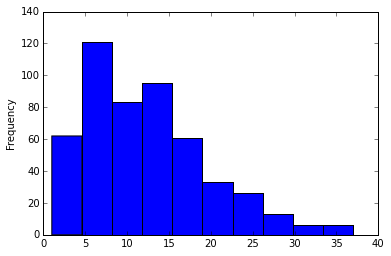

In [21]:
data["LSTAT_ABS"].plot.hist()

In [34]:
# Create bins for LSTAT variable
print data.shape
bins=[0,10,20,30,100]
lstat_grp=["lt_10","10_to_20","20_to_30","gt_30"]


# categories = pd.cut(df['Age'], bins, labels=lstat_grp)
data["LSTAT_GRP"] = pd.cut(data['LSTAT'], bins, labels=lstat_grp)
print "\n** Frequency ditribution of LSTAT_GRP derived feature **" 
print data["LSTAT_GRP"].value_counts()
print "\n** Percentage of LSTAT_GRP derived feature **" 
print data["LSTAT_GRP"].value_counts(normalize='True',sort='True',dropna='False')
data.head(10)

(506, 15)

** Frequency ditribution of LSTAT_GRP derived feature **
lt_10       219
10_to_20    213
20_to_30     62
gt_30        12
dtype: int64

** Percentage of LSTAT_GRP derived feature **
lt_10      0.432806
10_to_20   0.420949
20_to_30   0.122530
gt_30      0.023715
dtype: float64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_GRP,LSTAT_GRP
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,15.300000,396.900000,4.980000,24.000000,old,lt_10
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,17.800000,396.900000,9.140000,21.600000,very-old,lt_10
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242,17.800000,392.830000,4.030000,34.700000,old,lt_10
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,18.700000,394.630000,2.940000,33.400000,modern,lt_10
4,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3,222,18.700000,396.900000,5.330000,36.200000,old,lt_10
5,0.029850,0.000000,2.180000,0,0.458000,6.430000,58.700000,6.062200,3,222,18.700000,394.120000,5.210000,28.700000,old,lt_10
6,0.088290,12.500000,7.870000,0,0.524000,6.012000,66.600000,5.560500,5,311,15.200000,395.600000,12.430000,22.900000,old,10_to_20
7,0.144550,12.500000,7.870000,0,0.524000,6.172000,96.100000,5.950500,5,311,15.200000,396.900000,19.150000,27.100000,very-old,10_to_20
8,0.211240,12.500000,7.870000,0,0.524000,5.631000,100.000000,6.082100,5,311,15.200000,386.630000,29.930000,16.500000,very-old,20_to_30
9,0.170040,12.500000,7.870000,0,0.524000,6.004000,85.900000,6.592100,5,311,15.200000,386.710000,17.100000,18.900000,very-old,10_to_20


In [35]:
print (pd.crosstab(data['LSTAT_GRP'], data['LSTAT']))

LSTAT      1.730000   1.920000   1.980000   2.470000   2.870000   2.880000   \
LSTAT_GRP                                                                     
lt_10              1          1          1          1          1          1   
10_to_20           0          0          0          0          0          0   
20_to_30           0          0          0          0          0          0   
gt_30              0          0          0          0          0          0   

LSTAT      2.940000   2.960000   2.970000   2.980000     ...      30.620000  \
LSTAT_GRP                                                ...                  
lt_10              1          1          1          1    ...              0   
10_to_20           0          0          0          0    ...              0   
20_to_30           0          0          0          0    ...              0   
gt_30              0          0          0          0    ...              1   

LSTAT      30.630000  30.810000  31.990000  34.020